In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

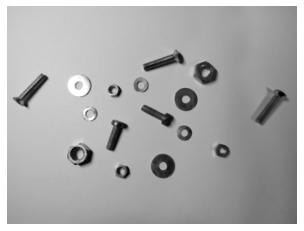

In [26]:
I_srubki = cv2.imread('details.png', cv2.IMREAD_GRAYSCALE)
I_srubki=cv2.medianBlur(I_srubki, 3)        
plt.imshow(I_srubki, 'gray')
plt.axis('off')
plt.show()

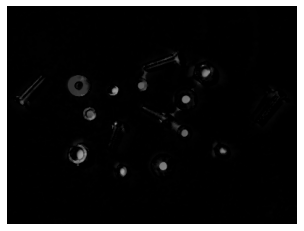

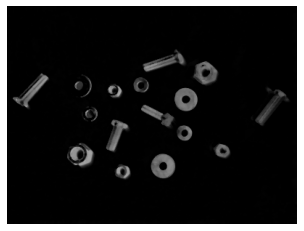

In [28]:
struct = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

fer_top=cv2.morphologyEx(I_srubki, cv2.MORPH_TOPHAT, struct)
fer_bla=cv2.morphologyEx(I_srubki, cv2.MORPH_BLACKHAT, struct)

plt.imshow(fer_top, 'gray', vmin=0, vmax=256)
plt.axis('off')
plt.show()
    
plt.imshow(fer_bla, 'gray', vmin=0, vmax=256)
plt.axis('off')
plt.show()

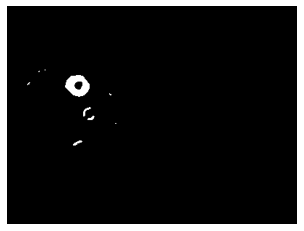

In [80]:
image_bin_pod=np.where(I_srubki < 210, 0, 1)
image_bin_pod=image_bin_pod.astype('uint8')
plt.imshow(image_bin_pod,'gray')
plt.axis('off')
plt.show()

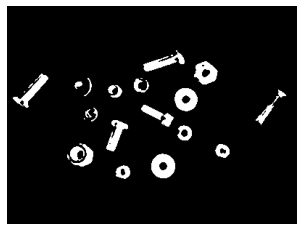

In [86]:
image_bin=np.where(fer_bla < 50, 0, 1)
image_bin=image_bin.astype('uint8')
plt.imshow(image_bin,'gray')
plt.axis('off')
plt.show()

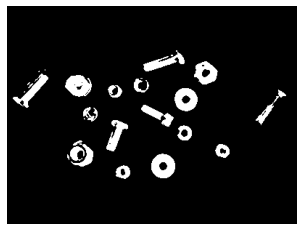

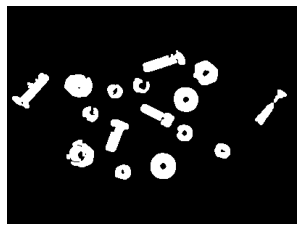

In [104]:
suma=image_bin+image_bin_pod
suma=suma.astype('uint8')
plt.imshow(suma,'gray')
plt.axis('off')
plt.show()
suma_bin=np.where(suma > 0, 1, 0)
suma_bin=suma_bin.astype('uint8')
suma_bin=cv2.medianBlur(suma_bin, 3)   
img_delat=cv2.dilate(suma_bin,np.ones((3,3)))
plt.imshow(img_delat,'gray')
plt.axis('off')
plt.show()

200.9075370206879


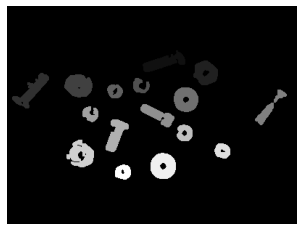

In [105]:
labels,I_indeks,stats,centroids = cv2.connectedComponentsWithStats(img_delat)
plt.imshow(I_indeks,'gray')
plt.axis('off')
print(centroids[0,0])

(-0.5, 399.5, 299.5, -0.5)

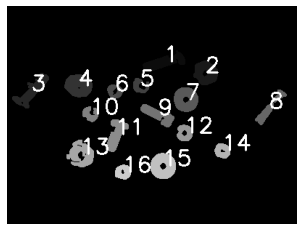

In [106]:
ccl_vis = I_indeks.copy()
s=0
for label_num in range(2,labels+1):
    cv2.putText(ccl_vis,str(label_num-1),(int(centroids[label_num-1,0]),int(centroids[label_num-1,1])),cv2.FONT_HERSHEY_SIMPLEX,1,(20,0,0),2)
plt.imshow(ccl_vis,'gray')
plt.axis('off')

Numer obiektu to: 1


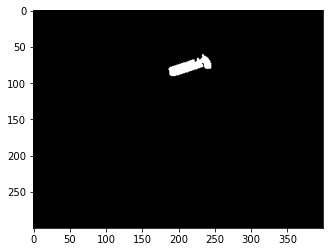

823.0
0.3751140376964275
0.10837874455894161
0.0004142251016508287
Numer obiektu to: 2


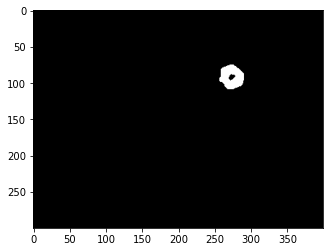

820.0
0.18029844858606198
0.00026382963979103627
2.5746680150282467e-05
Numer obiektu to: 3


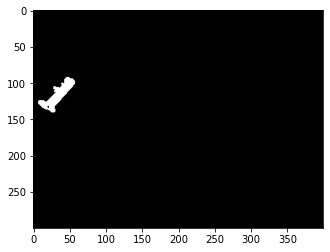

857.0
0.3578735382720725
0.08780367532381897
0.001549488838378059
Numer obiektu to: 4


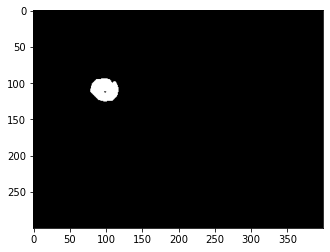

962.0
0.16516675131296737
0.0012941863732101185
1.294253965827118e-05
Numer obiektu to: 5


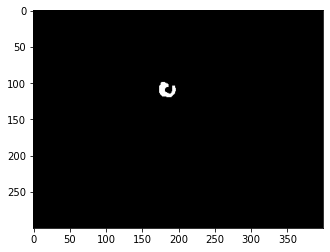

283.0
0.25779738768534827
0.004114243889396671
0.001454362205157736
Numer obiektu to: 6


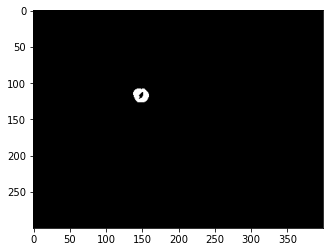

303.0
0.1956120194576712
0.0007398712889572141
5.214509688567954e-05
Numer obiektu to: 7


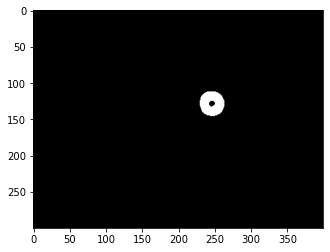

887.0
0.1765280080611902
2.2792514483227513e-05
4.260868265370363e-06
Numer obiektu to: 8


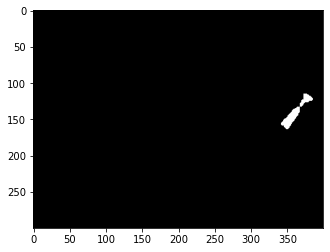

513.0
0.609881344488757
0.3261926020594724
0.02266804095328706
Numer obiektu to: 9


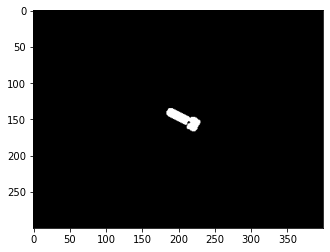

658.0
0.32754566255661377
0.0735821703701843
0.0019964629146885875
Numer obiektu to: 10


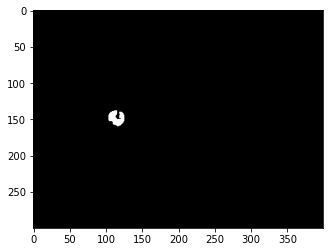

320.0
0.19906317138671833
0.0014958692865103397
0.0001961354118028468
Numer obiektu to: 11


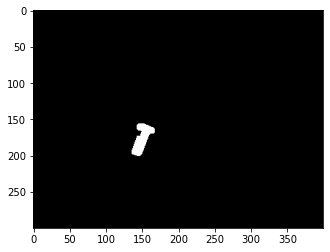

736.0
0.28026442293800724
0.04135569295502836
0.0018115646486220808
Numer obiektu to: 12


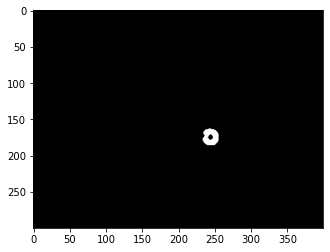

379.0
0.19200109684180017
0.00016051671663550905
4.314864362888997e-05
Numer obiektu to: 13


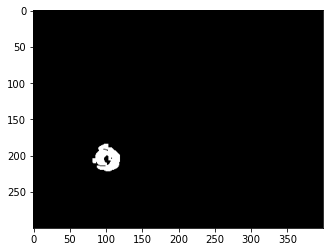

909.0
0.19134085030505973
0.00020981564351003153
0.0001795998440383158
Numer obiektu to: 14


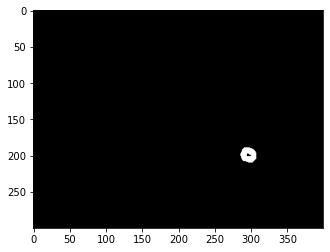

353.0
0.174097437975757
0.00035142225575114606
4.098374955118608e-06
Numer obiektu to: 15


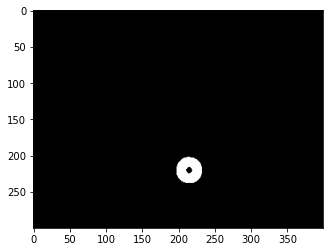

971.0
0.1765898080647112
7.4659356987250116e-06
1.7592423926460929e-06
Numer obiektu to: 16


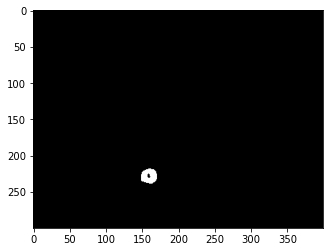

355.0
0.1754603798150835
0.00035969817679127697
5.8166261769021144e-05


In [114]:
momens_real = []
hu_momens_real = []
images_real = []
for i in range(1,labels):
    print("Numer obiektu to: {}".format(i))
    I = (I_indeks == i)*1
    I = I.astype('uint8')
    images_real.append(I)
    plt.imshow(I, 'gray')
    plt.show()
    momens_real.append(cv2.moments(I))
    hu_momens_real.append(cv2.HuMoments(momens_real[i-1]))
    print(momens_real[i-1]['m00'])
    print(hu_momens_real[i-1][0][0])
    print(hu_momens_real[i-1][1][0])
    print(hu_momens_real[i-1][2][0])

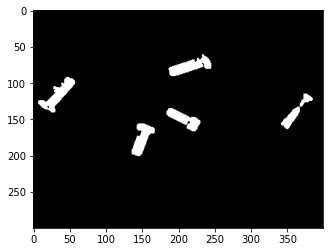

In [111]:
A , B = I_indeks.shape
puste_real = np.zeros((A,B))
for i in range(len(images_real)):
    if(momens_real[i]['m00']>319 and momens_real[i]['m00']<860 and hu_momens_real[i][0][0] > 0.19 and hu_momens_real[i][1][0]>0.04):
        puste_real += images_real[i]
plt.imshow(puste_real, 'gray')
plt.show()

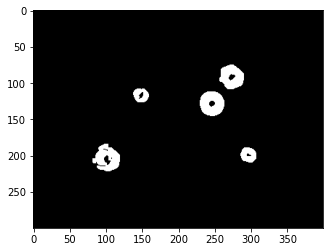

In [121]:
A , B = I_indeks.shape
puste_nakr = np.zeros((A,B))
for i in range(len(images_real)):
    if((momens_real[i]['m00']>302 and momens_real[i]['m00']<355 and hu_momens_real[i][0][0] > 0.17 and hu_momens_real[i][0][0] < 0.196) 
       or ((momens_real[i]['m00']>819 and momens_real[i]['m00']<910 and hu_momens_real[i][0][0] > 0.17 and hu_momens_real[i][0][0] < 0.20))):
        puste_nakr += images_real[i]
plt.imshow(puste_nakr, 'gray')
plt.show()

Nakrętki

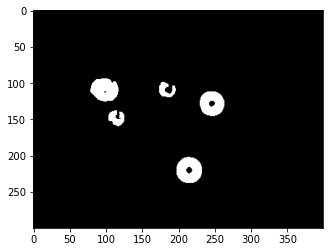

In [133]:
A , B = I_indeks.shape
puste_pod = np.zeros((A,B))
for i in range(len(images_real)):
    if((momens_real[i]['m00']>282 and momens_real[i]['m00']<380 and hu_momens_real[i][0][0] > 0.19 and hu_momens_real[i][0][0] < 0.26 and hu_momens_real[i][2][0] > 5.25*10**(-5))
       or ((momens_real[i]['m00']>886 and momens_real[i]['m00']<972 and hu_momens_real[i][0][0] > 0.16 and hu_momens_real[i][0][0] < 0.18))):
        puste_pod += images_real[i]
plt.imshow(puste_pod, 'gray')
plt.show()

Podkładki